<font size = 6 color = 'maroon'>Descriptive Statistics</font>

Analytics starts with understanding the data and its context. Correct comprehension of the dataset and its statistics leads to better conclusions. This exercise demonstrates exploration and descriptive statistics of the Song Popularity open dataset from Kaggle.

Dataset: https://www.kaggle.com/datasets/yasserh/song-popularity-dataset?resource=download&select=song_data.csv

**Intro to the Dataset**

The Song Popularity dataset contains song titles and its features. It conveniently has a numeric metric of popularity. The qualities of the songs, such as danceability and energy among others, are also numerically described in the dataset.


# Preliminaries

Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns

Import data

In [2]:
df = pd.read_csv("song_data.csv")
display(df)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18830,Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
18831,Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
18832,Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286
18833,Gentle on My Mind,55,352280,0.945000,0.488,0.326,0.015700,3,0.1190,-12.020,1,0.0328,106.063,4,0.323


# Data Description

Check the data types.

In [3]:
df.dtypes

song_name            object
song_popularity       int64
song_duration_ms      int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
audio_mode            int64
speechiness         float64
tempo               float64
time_signature        int64
audio_valence       float64
dtype: object

Check the shape of the dataset.

In [4]:
rows, columns = df.shape
print('The dataset has {} records and {} columns.'.format(rows,columns))
print('Total of {} elements.'.format(rows*columns))

The dataset has 18835 records and 15 columns.
Total of 282525 elements.


For numerical columns, we can quickly generate statistics.

In [5]:
df.describe()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


We can also check for unique values

In [6]:
df["key"].unique()

array([ 8,  3,  0, 10,  4,  2,  1,  9,  7, 11,  5,  6], dtype=int64)

In [7]:
df["audio_mode"].unique()

array([1, 0], dtype=int64)

In [8]:
df["time_signature"].unique()

array([4, 3, 1, 5, 0], dtype=int64)

# Data Cleaning

## Aligning Datatypes

Notice that for some columns, even though they are numerical characters, they are used nominally or ordinally. For columns such as key, audio_mode, and time_signature, it makes sense to identify their datatypes as category or strings.

In [9]:
df[['key','audio_mode','time_signature']] = df[['key','audio_mode','time_signature']].astype('category')

Check dtypes again and notice the changed datatypes.

In [10]:
df.dtypes

song_name             object
song_popularity        int64
song_duration_ms       int64
acousticness         float64
danceability         float64
energy               float64
instrumentalness     float64
key                 category
liveness             float64
loudness             float64
audio_mode          category
speechiness          float64
tempo                float64
time_signature      category
audio_valence        float64
dtype: object

## Check for nulls

Records with null values are candidates for dropping. We can check whether such records exist. Below shows 0 null entries for all columns.

In [11]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

## Convertions
Notice that song_duration_ms is in milliseconds, which is not so intuitive. We may want to convert this to a more relatable unit, such as seconds, minutes, or hours.

In [12]:
df['song_duration_mins'] = df['song_duration_ms'].apply(lambda x: x/1000/60)

# Column Descriptions

## Basic Stats

Some stats we can check for each column: distribution, central tendency, dispersion, and shape. 

Let's try to show these for song_popularity.

array([[<AxesSubplot:title={'center':'song_popularity'}>]], dtype=object)

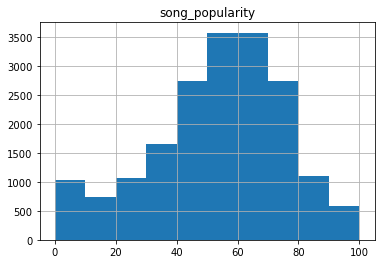

In [13]:
# histogram for the distributions
col = ['song_popularity']

# Option 1: using pandas df.hist()
df[col].hist()

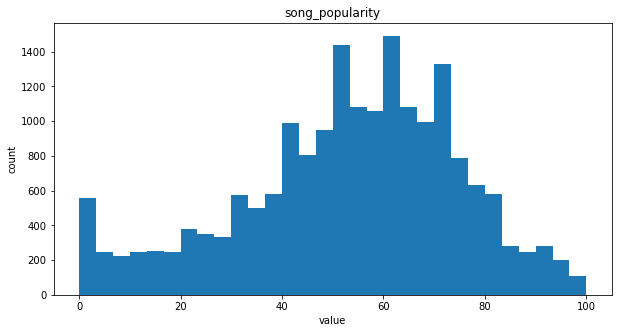

In [14]:
# Option 2: using pyplot as a more flexible alternative to pandas df.hist()
import matplotlib.pyplot as plt
from scipy.stats import norm

x = df[col[0]]

plt.figure(figsize=(10,5))
plt.hist(x=x # x-axis values
         , bins = 30 # number of bins
        )

# plt.plot(x,
#         norm.pdf(x)
#         )

plt.title(col[0])
plt.xlabel('value')
plt.ylabel('count')
plt.show()

**Measures of central tendency**

A common question to ask is where the center of the distribution is located. This is commonly answered by using the "average" of the values. It is commonly calculated as the mean, however, it can also be defined to be the median or mode, whichever is needed or more convenient. 

The relationship of these metrics also reveals information about the shape of the distribution.
* No-skew (Normal skewness): mean = median = mode
* Right-skewed (Positive skewness): mode < median < mean (the tail extends [outliers] to the right)
* Left-skewed (Negative skewness): mean < median < mode (the tail extends [outliers] to the left)

In [15]:
mean = df[col].mean()[0]
median = df[col].median()[0]
mode = df[col].mode().loc[0][0]

skew = str()
if mean == median and median == mode:
    skew = 'No-skew'
elif mean > median and median > mode:
    skew = 'Right-skewed'
elif mean < median and median < mode:
    skew = 'Left-skewed'
else:
    None
       

print(
"""
{}
Mean: {:.2f}
Median: {}
Mode: {}
The distribution is {}.
""".format(str(col[0]),mean,median,mode,skew)
)


song_popularity
Mean: 52.99
Median: 56.0
Mode: 58
The distribution is Left-skewed.



**Measures of dispersion**

After knowing the center of the distribution, the next is to understand how concentrated [or dispersed] the values are to the mean. 

- Variance is the average squared distances from the mean. 
- Standard Deviation is, mathematically, the square root of the variance. Practically, we observe by empirical rule that 99.7% of data points falls within 3 standard deviations. Meaning, 99.7% falls within *mean - 3\*std* and *mean + 3\*std*.
- Range is simply the difference between the highest and lowest observed value.
- Interquartile Range (IQR) is the difference between the 75th and 25th percentile bounds. Practically, take the top 50% nearest data points to the median and take the range of those values.

In [16]:
std = df[col].std()[0]
var = df[col].var()[0]
rng = df[col].max()[0] - df[col].min()[0]
perc25 = df[col].quantile(0.25)[0] # 25th percentile
perc75 = df[col].quantile(0.75)[0] # 75th percentile
IQR = perc75 - perc25

# empirical rule

# 68% of values within 1 standard deviations
std1_lower = mean - 1*std
std1_upper = mean + 1*std

# 95% of values within 2 standard deviations
std2_lower = mean - 2*std
std2_upper = mean + 2*std

# 99.7% of values within 3 standard deviations
std3_lower = mean - 3*std
std3_upper = mean + 3*std

print(
"""
{}
Standard Deviation: {:.2f}
Variance: {:.2f}
Range: {}
Interquartile range: {} within values {:.2f} and {:.2f}

By empirical rule:
68% of values fall within {:.2f} and {:.2f}
95% of values fall within {:.2f} and {:.2f}
99.7% of values fall within {:.2f} and {:.2f}
""".format(str(col[0]),std,var,rng,IQR,perc25,perc75,std1_lower,std1_upper,std2_lower,std2_upper,std2_lower,std2_upper)
)


song_popularity
Standard Deviation: 21.91
Variance: 479.86
Range: 100
Interquartile range: 29.0 within values 40.00 and 69.00

By empirical rule:
68% of values fall within 31.09 and 74.90
95% of values fall within 9.18 and 96.80
99.7% of values fall within 9.18 and 96.80



**Measures of Shape**
The center and dispersion of the distribution may take many shapes. Some may be more skewed than others. Some may be more concentrated to the mean than others. For these, we can calulate Skewness and Kurtosis.
- Skewness describes the asymmetry of the distribution. A positive skew results from a right-skewed distribution, i.e., the right tail is extended [outliers] , as oppose to a negative skew.
- Kurtosis describes the peakedness of the distribution. A positive kurtosis results from a thin ("lepto") distribution with long tails, a.k.a. leptokurtic. A negative kurtosis results from a broad ("platy") distribution with short tail, a.k.a. platykurtic.

For both measures, normal distribution has value 0.

In [17]:
skew = df[col].skew()[0]
kurt = df[col].kurt()[0]

skewness = str()
if skew == 0:
    skewness = 'Normal'
elif skew < 0:
    skewness = 'Left-skewed'
elif skew > 0:
    skewness = 'Right-skewed'
else:
    None
    
kurtosis = str()
if kurt == 0:
    kurtosis = 'Normal'
elif kurt < 0:
    kurtosis = 'Platykurtic (Broad, short tails)'
elif kurt > 0:
    kurtosis = 'Leptokurtic (Thin, long tails)'
else:
    None

print(
"""
{}
Skewness: {:.4f} {}
Kurtosis: {:.4f} {}
"""
.format(col[0],skew,skewness,kurt,kurtosis)
)


song_popularity
Skewness: -0.5015 Left-skewed
Kurtosis: -0.1691 Platykurtic (Broad, short tails)



**Describe() method** 

An easy way to gather some basic stats.

In [18]:
df[col[0]].describe()

count    18835.000000
mean        52.991877
std         21.905654
min          0.000000
25%         40.000000
50%         56.000000
75%         69.000000
max        100.000000
Name: song_popularity, dtype: float64

## per Column

### Define quick_stat() function for numeric variables
To help make generating stats easily reusable and iterable, we can define quick_stats() as a function that generates all basic stats in one run.

In [19]:
def quick_stat(df,col):
    """
    param df : source dataframe
    param col : string column name
    """
    x = df[[col]]
    
    # Central Tendency
    mean = x.mean()[0]
    median = x.median()[0]
    mode = x.mode().loc[0][0]

    skew1 = str()
    if mean == median and median == mode:
        skew1 = 'No-skew'
    elif mean > median and median > mode:
        skew1 = 'Right-skewed'
    elif mean < median and median < mode:
        skew1 = 'Left-skewed'
    else:
        None
    
    # Dispersion
    std = x.std()[0]
    var = x.var()[0]
    rng = x.max()[0] - x.min()[0]
    perc25 =x.quantile(0.25)[0] # 25th percentile
    perc75 = x.quantile(0.75)[0] # 75th percentile
    IQR = perc75 - perc25

    # empirical rule

    # 68% of values within 1 standard deviations
    std1_lower = mean - 1*std
    std1_upper = mean + 1*std

    # 95% of values within 2 standard deviations
    std2_lower = mean - 2*std
    std2_upper = mean + 2*std

    # 99.7% of values within 3 standard deviations
    std3_lower = mean - 3*std
    std3_upper = mean + 3*std

    # Shape
    skew = x.skew()[0]
    kurt = x.kurt()[0]

    skewness = str()
    if skew == 0:
        skewness = 'Normal'
    elif skew < 0:
        skewness = 'Left-skewed'
    elif skew > 0:
        skewness = 'Right-skewed'
    else:
        None

    kurtosis = str()
    if kurt == 0:
        kurtosis = 'Normal'
    elif kurt < 0:
        kurtosis = 'Platykurtic (Broad, short tails)'
    elif kurt > 0:
        kurtosis = 'Leptokurtic (Thin, long tails)'
    else:
        None

    
    
    

    plt.figure(figsize=(10,5))
    plt.hist(x=x # x-axis values
             , bins = 30 # number of bins
             , label = col
            )

    plt.axvline(x=mean, color = 'r', linestyle = '--', label = 'Mean')
    plt.axvline(x=median, color = 'y', linestyle = '--', label = 'Median')
    plt.axvline(x=mode, color = 'c', linestyle = '--', label = 'Mode')
    
    plt.axvline(x=std3_upper, color = 'black', linestyle = '-.', label = '+3 std')
    plt.axvline(x=std3_lower, color = 'violet', linestyle = '-.', label = '-3 std')
    
    plt.title(col)
    plt.xlabel('value')
    plt.ylabel('count')
    
    plt.legend()
    plt.show()
    
    print(
    """
    {}
    Mean: {:.2f}
    Median: {:.2f}
    Mode: {:.2f}
    The distribution is {} by mean,mode, median relationships.
    
    Standard Deviation: {:.2f}
    Variance: {:.2f}
    Range: {:.2f}
    Interquartile range: {:.2f} within values {:.2f} and {:.2f}
    
    By empirical rule:
    68% of values fall within {:.2f} and {:.2f}
    95% of values fall within {:.2f} and {:.2f}
    99.7% of values fall within {:.2f} and {:.2f}
    
    Skewness: {:.4f} {}
    Kurtosis: {:.4f} {}
    --------------------------------
    --------------------------------
    """.format(col,mean,median,mode,skew1
                ,std,var,rng,IQR,perc25,perc75,std1_lower,std1_upper,std2_lower,std2_upper,std2_lower,std2_upper
                ,skew,skewness,kurt,kurtosis
              )
    )
    


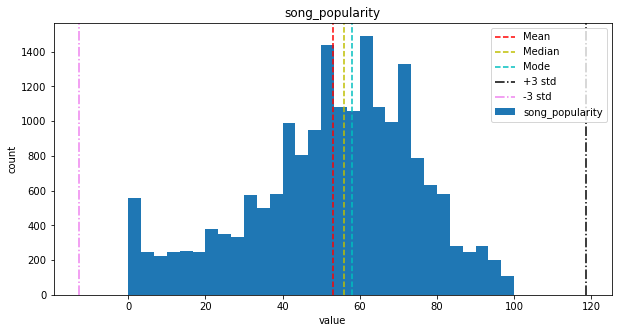


    song_popularity
    Mean: 52.99
    Median: 56.00
    Mode: 58.00
    The distribution is Left-skewed by mean,mode, median relationships.
    
    Standard Deviation: 21.91
    Variance: 479.86
    Range: 100.00
    Interquartile range: 29.00 within values 40.00 and 69.00
    
    By empirical rule:
    68% of values fall within 31.09 and 74.90
    95% of values fall within 9.18 and 96.80
    99.7% of values fall within 9.18 and 96.80
    
    Skewness: -0.5015 Left-skewed
    Kurtosis: -0.1691 Platykurtic (Broad, short tails)
    --------------------------------
    --------------------------------
    


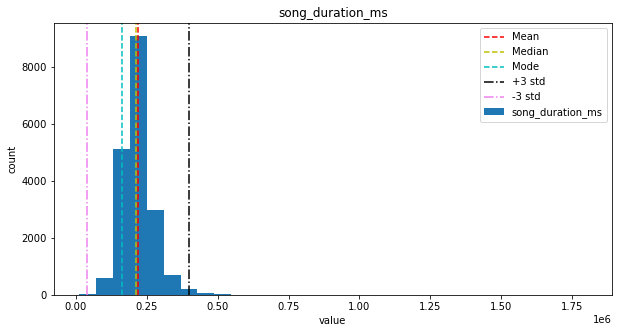


    song_duration_ms
    Mean: 218211.59
    Median: 211306.00
    Mode: 165000.00
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 59887.54
    Variance: 3586517515.08
    Range: 1787346.00
    Interquartile range: 58504.50 within values 184339.50 and 242844.00
    
    By empirical rule:
    68% of values fall within 158324.05 and 278099.13
    95% of values fall within 98436.51 and 337986.67
    99.7% of values fall within 98436.51 and 337986.67
    
    Skewness: 3.2575 Right-skewed
    Kurtosis: 46.7089 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    


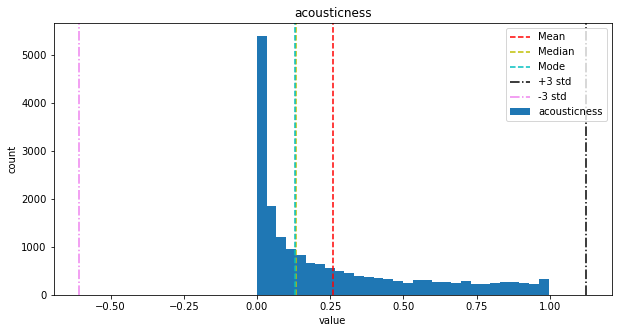


    acousticness
    Mean: 0.26
    Median: 0.13
    Mode: 0.13
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.29
    Variance: 0.08
    Range: 1.00
    Interquartile range: 0.40 within values 0.02 and 0.42
    
    By empirical rule:
    68% of values fall within -0.03 and 0.55
    95% of values fall within -0.32 and 0.84
    99.7% of values fall within -0.32 and 0.84
    
    Skewness: 1.0712 Right-skewed
    Kurtosis: -0.0963 Platykurtic (Broad, short tails)
    --------------------------------
    --------------------------------
    


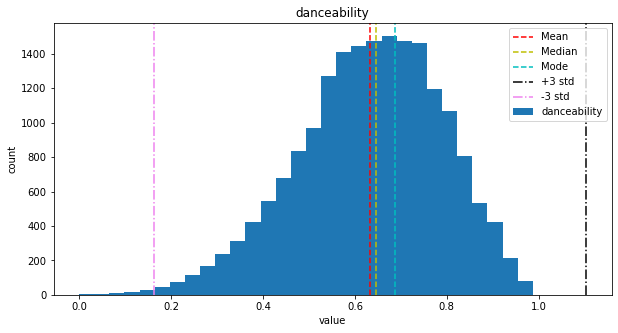


    danceability
    Mean: 0.63
    Median: 0.65
    Mode: 0.69
    The distribution is Left-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.16
    Variance: 0.02
    Range: 0.99
    Interquartile range: 0.22 within values 0.53 and 0.75
    
    By empirical rule:
    68% of values fall within 0.48 and 0.79
    95% of values fall within 0.32 and 0.95
    99.7% of values fall within 0.32 and 0.95
    
    Skewness: -0.3917 Left-skewed
    Kurtosis: -0.0748 Platykurtic (Broad, short tails)
    --------------------------------
    --------------------------------
    


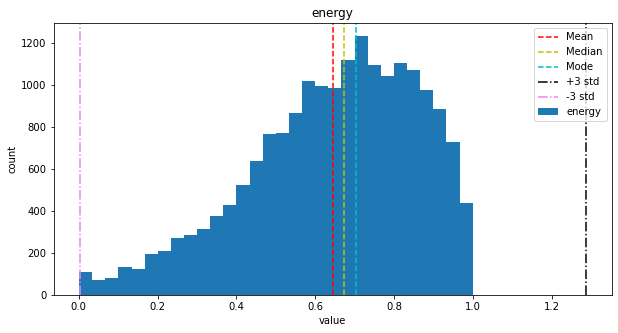


    energy
    Mean: 0.64
    Median: 0.67
    Mode: 0.70
    The distribution is Left-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.21
    Variance: 0.05
    Range: 1.00
    Interquartile range: 0.30 within values 0.51 and 0.81
    
    By empirical rule:
    68% of values fall within 0.43 and 0.86
    95% of values fall within 0.22 and 1.07
    99.7% of values fall within 0.22 and 1.07
    
    Skewness: -0.6207 Left-skewed
    Kurtosis: -0.1379 Platykurtic (Broad, short tails)
    --------------------------------
    --------------------------------
    


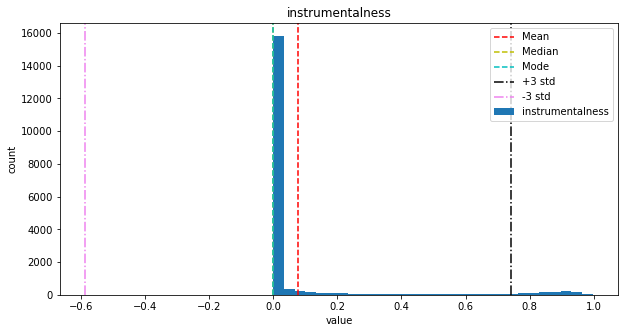


    instrumentalness
    Mean: 0.08
    Median: 0.00
    Mode: 0.00
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.22
    Variance: 0.05
    Range: 1.00
    Interquartile range: 0.00 within values 0.00 and 0.00
    
    By empirical rule:
    68% of values fall within -0.14 and 0.30
    95% of values fall within -0.37 and 0.52
    99.7% of values fall within -0.37 and 0.52
    
    Skewness: 2.9852 Right-skewed
    Kurtosis: 7.5637 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    


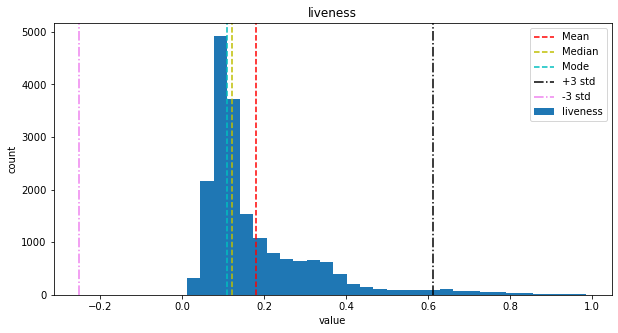


    liveness
    Mean: 0.18
    Median: 0.12
    Mode: 0.11
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.14
    Variance: 0.02
    Range: 0.98
    Interquartile range: 0.13 within values 0.09 and 0.22
    
    By empirical rule:
    68% of values fall within 0.04 and 0.32
    95% of values fall within -0.11 and 0.47
    99.7% of values fall within -0.11 and 0.47
    
    Skewness: 2.2154 Right-skewed
    Kurtosis: 5.7899 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    


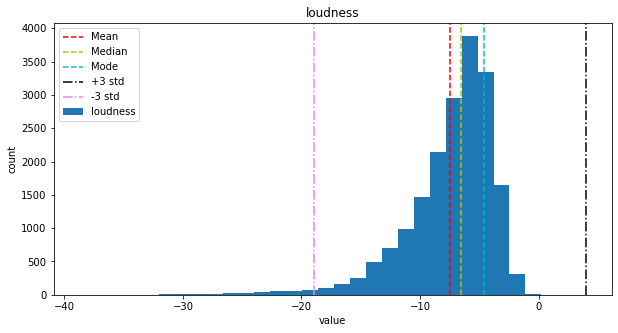


    loudness
    Mean: -7.45
    Median: -6.55
    Mode: -4.59
    The distribution is Left-skewed by mean,mode, median relationships.
    
    Standard Deviation: 3.83
    Variance: 14.65
    Range: 40.35
    Interquartile range: 4.14 within values -9.04 and -4.91
    
    By empirical rule:
    68% of values fall within -11.28 and -3.62
    95% of values fall within -15.10 and 0.21
    99.7% of values fall within -15.10 and 0.21
    
    Skewness: -1.9295 Left-skewed
    Kurtosis: 6.5225 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    


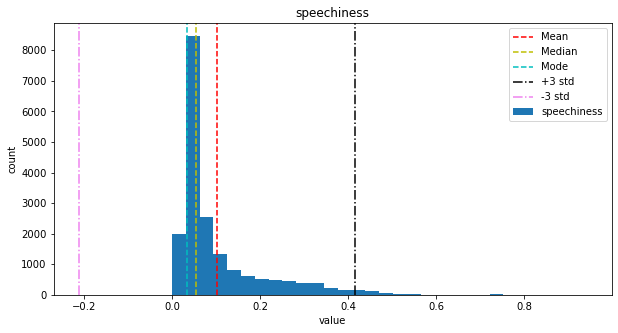


    speechiness
    Mean: 0.10
    Median: 0.06
    Mode: 0.03
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.10
    Variance: 0.01
    Range: 0.94
    Interquartile range: 0.08 within values 0.04 and 0.12
    
    By empirical rule:
    68% of values fall within -0.00 and 0.21
    95% of values fall within -0.11 and 0.31
    99.7% of values fall within -0.11 and 0.31
    
    Skewness: 2.2710 Right-skewed
    Kurtosis: 6.5050 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    


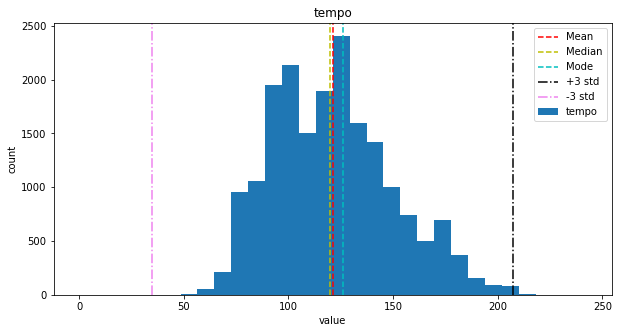


    tempo
    Mean: 121.07
    Median: 120.01
    Mode: 125.98
    The distribution is  by mean,mode, median relationships.
    
    Standard Deviation: 28.71
    Variance: 824.52
    Range: 242.32
    Interquartile range: 41.56 within values 98.37 and 139.93
    
    By empirical rule:
    68% of values fall within 92.36 and 149.79
    95% of values fall within 63.64 and 178.50
    99.7% of values fall within 63.64 and 178.50
    
    Skewness: 0.4429 Right-skewed
    Kurtosis: -0.2175 Platykurtic (Broad, short tails)
    --------------------------------
    --------------------------------
    


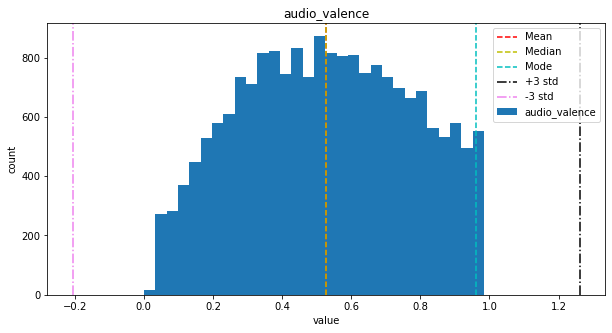


    audio_valence
    Mean: 0.53
    Median: 0.53
    Mode: 0.96
    The distribution is  by mean,mode, median relationships.
    
    Standard Deviation: 0.24
    Variance: 0.06
    Range: 0.98
    Interquartile range: 0.39 within values 0.34 and 0.72
    
    By empirical rule:
    68% of values fall within 0.28 and 0.77
    95% of values fall within 0.04 and 1.02
    99.7% of values fall within 0.04 and 1.02
    
    Skewness: -0.0164 Left-skewed
    Kurtosis: -0.9777 Platykurtic (Broad, short tails)
    --------------------------------
    --------------------------------
    


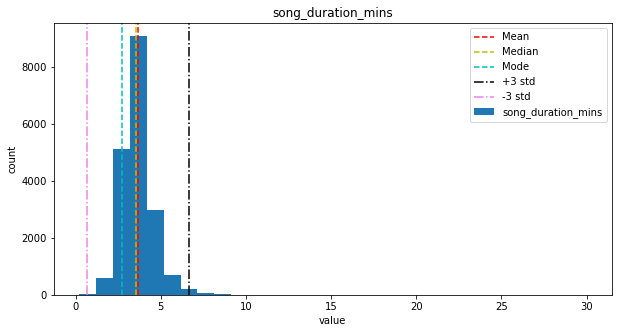


    song_duration_mins
    Mean: 3.64
    Median: 3.52
    Mode: 2.75
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 1.00
    Variance: 1.00
    Range: 29.79
    Interquartile range: 0.98 within values 3.07 and 4.05
    
    By empirical rule:
    68% of values fall within 2.64 and 4.63
    95% of values fall within 1.64 and 5.63
    99.7% of values fall within 1.64 and 5.63
    
    Skewness: 3.2575 Right-skewed
    Kurtosis: 46.7089 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    
Wall time: 1.86 s


In [20]:
%%time
cols = df.select_dtypes(include=np.number).columns.values # choose numeric columns only
for i in cols:
    quick_stat(df,i)

### Distribution for categorical variables
Most of the stats cannot be calculated for categorical variables, still we can atleast see the distributions.

In [21]:
df.dtypes

song_name               object
song_popularity          int64
song_duration_ms         int64
acousticness           float64
danceability           float64
energy                 float64
instrumentalness       float64
key                   category
liveness               float64
loudness               float64
audio_mode            category
speechiness            float64
tempo                  float64
time_signature        category
audio_valence          float64
song_duration_mins     float64
dtype: object

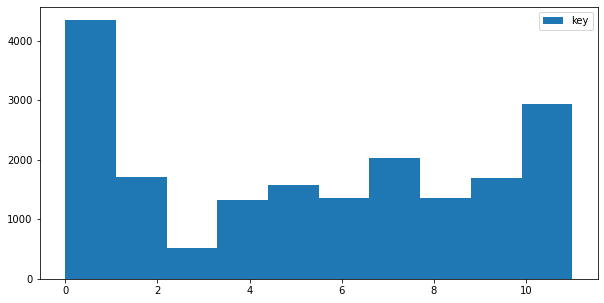

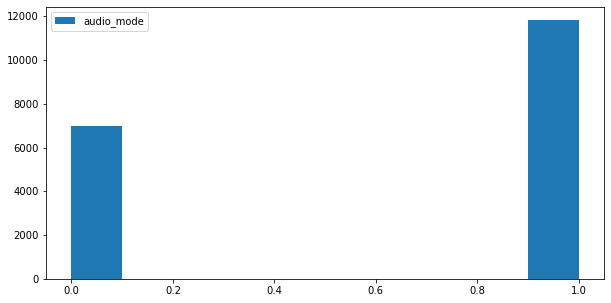

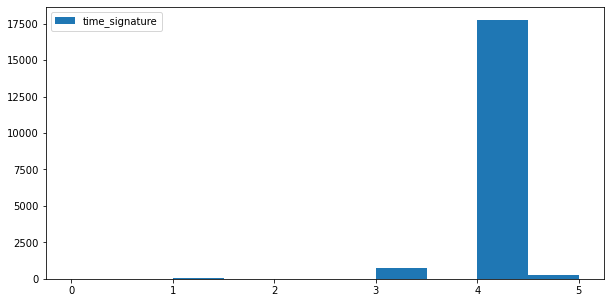

In [22]:
cols = df.select_dtypes(include=['category']).columns.values # choose categorical columns only

for i in cols:
    
    data = df[[i]]
#     print(data)
    plt.figure(figsize = (10,5))
    plt.hist(data, label = i)
    
    plt.legend()
    plt.show()
    


# Handling Outliers
Outliers are data points that far from the center, either abnormally or erroneously. To identify them, either consider the standard deviations or IQR.

## Identifying by Standard Deviations
By Empirical rule, 99.7% of observations is within 3 standard deviations from the mean. We can this rule to identify outliers.

**Take the variable speechiness for example.**

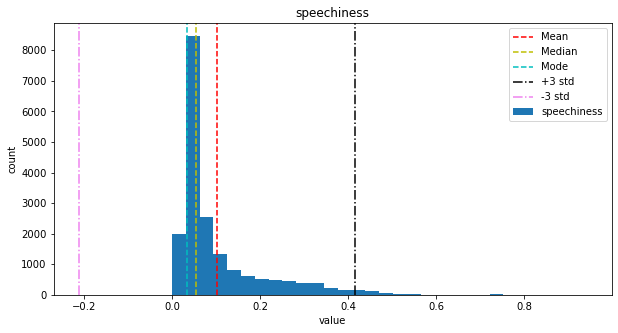


    speechiness
    Mean: 0.10
    Median: 0.06
    Mode: 0.03
    The distribution is Right-skewed by mean,mode, median relationships.
    
    Standard Deviation: 0.10
    Variance: 0.01
    Range: 0.94
    Interquartile range: 0.08 within values 0.04 and 0.12
    
    By empirical rule:
    68% of values fall within -0.00 and 0.21
    95% of values fall within -0.11 and 0.31
    99.7% of values fall within -0.11 and 0.31
    
    Skewness: 2.2710 Right-skewed
    Kurtosis: 6.5050 Leptokurtic (Thin, long tails)
    --------------------------------
    --------------------------------
    


In [23]:
var = 'speechiness'
quick_stat(df,var)

In [24]:
# calculate mean and std
mean = df['speechiness'].mean()
std = df['speechiness'].std()

# define the upper and lower bound as 3 std from the means
upper = mean + 3*std
lower = mean - 3*std

# identify outliers outside the bounds
df['outliers_3std'] = 0
df['outliers_3std'] = df[['speechiness','outliers_3std']].apply(lambda x: 1 if x['speechiness'] > upper else (1 if x['speechiness'] < lower else x['outliers_3std']),axis = 1)

Quick check on how many outliers are identified.

In [25]:
df.groupby('outliers_3std').count()['song_name']

outliers_3std
0.0    18474
1.0      361
Name: song_name, dtype: int64

It is up to the user what to do with these outliers. Keep or drop? It is useful to do visual inspections and on these outliers. If it is identified that the data is correct and expected, then it might be good to keep. There are other methods for evaluations.

In [26]:
df[df['outliers_3std']==1].head(5)

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence,song_duration_mins,outliers_3std
77,Love N Hennessy REMIX (feat. 2 Chainz & Nicky ...,64,253714,0.0257,0.928,0.402,0.000000,8,0.0804,-7.569,0,0.451,139.998,4,0.620,4.228567,1.0
389,Tom's Diner,46,129106,0.5890,0.712,0.167,0.000000,1,0.1570,-22.047,0,0.891,96.637,4,0.376,2.151767,1.0
845,"Flava In Ya Ear (feat. The Notorious B.I.G., L...",51,302866,0.2030,0.500,0.899,0.000000,9,0.1770,-3.907,0,0.467,177.815,4,0.754,5.047767,1.0
1510,Acoustic,31,172199,0.7850,0.880,0.245,0.000032,9,0.0979,-10.245,1,0.446,76.006,4,0.638,2.869983,1.0
1745,Anticipation,29,230160,0.3100,0.549,0.562,0.000000,10,0.1050,-10.664,0,0.434,83.463,4,0.861,3.836000,1.0


**Apply the method to all numeric columns.**

In [27]:
cols = df.select_dtypes(include = np.number).columns.values
for i in cols:
    display(df[[i,'outliers_3std']])

,song_popularity,outliers_3std
0,73,0.0
1,66,0.0
2,76,0.0
3,74,0.0
4,56,0.0
...,...,...
18830,60,0.0
18831,60,0.0
18832,23,0.0
18833,55,0.0


,song_duration_ms,outliers_3std
0,262333,0.0
1,216933,0.0
2,231733,0.0
3,216933,0.0
4,223826,0.0
...,...,...
18830,159645,0.0
18831,205666,0.0
18832,182211,0.0
18833,352280,0.0


,acousticness,outliers_3std
0,0.005520,0.0
1,0.010300,0.0
2,0.008170,0.0
3,0.026400,0.0
4,0.000954,0.0
...,...,...
18830,0.893000,0.0
18831,0.765000,0.0
18832,0.847000,0.0
18833,0.945000,0.0


,danceability,outliers_3std
0,0.496,0.0
1,0.542,0.0
2,0.737,0.0
3,0.451,0.0
4,0.447,0.0
...,...,...
18830,0.500,0.0
18831,0.495,0.0
18832,0.719,0.0
18833,0.488,0.0


,energy,outliers_3std
0,0.682,0.0
1,0.853,0.0
2,0.463,0.0
3,0.970,0.0
4,0.766,0.0
...,...,...
18830,0.151,0.0
18831,0.161,0.0
18832,0.325,0.0
18833,0.326,0.0


,instrumentalness,outliers_3std
0,0.000029,0.0
1,0.000000,0.0
2,0.447000,0.0
3,0.003550,0.0
4,0.000000,0.0
...,...,...
18830,0.000065,0.0
18831,0.000001,0.0
18832,0.000000,0.0
18833,0.015700,0.0


,liveness,outliers_3std
0,0.0589,0.0
1,0.1080,0.0
2,0.2550,0.0
3,0.1020,0.0
4,0.1130,0.0
...,...,...
18830,0.1110,0.0
18831,0.1050,0.0
18832,0.1250,0.0
18833,0.1190,0.0


,loudness,outliers_3std
0,-4.095,0.0
1,-6.407,0.0
2,-7.828,0.0
3,-4.938,0.0
4,-5.065,0.0
...,...,...
18830,-16.107,0.0
18831,-14.078,0.0
18832,-12.222,0.0
18833,-12.020,0.0


,speechiness,outliers_3std
0,0.0294,0.0
1,0.0498,0.0
2,0.0792,0.0
3,0.1070,0.0
4,0.0313,0.0
...,...,...
18830,0.0348,0.0
18831,0.0301,0.0
18832,0.0355,0.0
18833,0.0328,0.0


,tempo,outliers_3std
0,167.060,0.0
1,105.256,0.0
2,123.881,0.0
3,122.444,0.0
4,172.011,0.0
...,...,...
18830,113.969,0.0
18831,94.286,0.0
18832,130.534,0.0
18833,106.063,0.0


,audio_valence,outliers_3std
0,0.474,0.0
1,0.370,0.0
2,0.324,0.0
3,0.198,0.0
4,0.574,0.0
...,...,...
18830,0.300,0.0
18831,0.265,0.0
18832,0.286,0.0
18833,0.323,0.0


,song_duration_mins,outliers_3std
0,4.372217,0.0
1,3.615550,0.0
2,3.862217,0.0
3,3.615550,0.0
4,3.730433,0.0
...,...,...
18830,2.660750,0.0
18831,3.427767,0.0
18832,3.036850,0.0
18833,5.871333,0.0


,outliers_3std,outliers_3std
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
18830,0.0,0.0
18831,0.0,0.0
18832,0.0,0.0
18833,0.0,0.0


In [28]:
cols = df.select_dtypes(include = np.number).columns.values
col_outlier = 'outliers_3std'
df[col_outlier] = 0
cols = np.delete(cols,np.where(cols == col_outlier))
# cols.pop('outliers_3std')
for i in cols:
    # calculate mean and std
    mean = df[i].mean()
    std = df[i].std()

    # define the upper and lower bound as 3 std from the means
    upper = mean + 3*std
    lower = mean - 3*std

    
    df[col_outlier] = df[[i,col_outlier]].apply(lambda x: 1 if x[i] > upper else (1 if x[i] < lower else x[col_outlier]),axis = 1)
    
outliers = df.groupby(col_outlier).count()['song_name'][1]
records = df.shape[0]

print(
"""{} equivalent to {:.2f}% out of {} total records are outliers.
"""
.format(outliers, outliers/records*100,records)
)

2144 equivalent to 11.38% out of 18835 total records are outliers.



## Identifying by IQR
IQR locates 50% nearest data points from the median. We can identify outliers by defining the bounds to be only within 1.5 times of the IQR from the 1st and 3rd quartiles.

**Take the variable speechiness for example.**

In [29]:
# calculate 1st and 3rd quartile
qtr1 = df['speechiness'].quantile(.25)
qtr3 = df['speechiness'].quantile(.75)

# calculate IQR
IQR = qtr3 - qtr1

# define the upper and lower bounds 
upper = qtr3 + 1.5*IQR
lower = qtr1 - 1.5*IQR

# identify outliers outside the bounds
df['outliers_IQR'] = 0
df['outliers_IQR'] = df[['speechiness','outliers_IQR']].apply(lambda x: 1 if x['speechiness'] > upper else (1 if x['speechiness'] < lower else x['outliers_IQR']),axis = 1)

Quick check on how many outliers are identified.

In [30]:
df.groupby('outliers_IQR').count()['song_name']

outliers_IQR
0.0    16660
1.0     2175
Name: song_name, dtype: int64

Visualizing the IQR bounds, it can be observed that there really are a lot of data points beyond the upper bound.

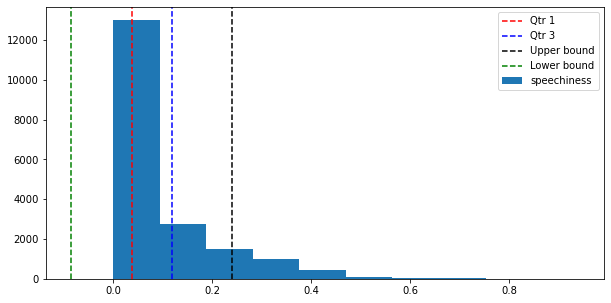

In [31]:
x = df['speechiness'].values
plt.figure(figsize=(10,5))
plt.hist(x, label = 'speechiness')

plt.axvline(x = qtr1, color = 'red', linestyle = '--', label = 'Qtr 1')
plt.axvline(x = qtr3, color = 'blue', linestyle = '--', label = 'Qtr 3')
plt.axvline(x = upper, color = 'black', linestyle = '--', label = 'Upper bound')
plt.axvline(x = lower, color = 'green', linestyle = '--', label = 'Lower bound')

plt.legend()
plt.show()

**Apply the method to all numeric columns.**

In [32]:
cols = df.select_dtypes(include = np.number).columns.values
col_outlier = 'outliers_IQR'
df[col_outlier] = 0
cols = np.delete(cols,np.where(cols == col_outlier))
# cols.pop('outliers_3std')
for i in cols:
    # calculate 1st and 3rd quartile
    qtr1 = df[i].quantile(.25)
    qtr3 = df[i].quantile(.75)

    # calculate IQR
    IQR = qtr3 - qtr1

    # define the upper and lower bounds 
    upper = qtr3 + 1.5*IQR
    lower = qtr1 - 1.5*IQR

    
    df[col_outlier] = df[[i,col_outlier]].apply(lambda x: 1 if x[i] > upper else (1 if x[i] < lower else x[col_outlier]),axis = 1)
    
outliers = df.groupby(col_outlier).count()['song_name'][1]
records = df.shape[0]

print(
"""{} equivalent to {:.2f}% out of {} total records are outliers.
"""
.format(outliers, outliers/records*100,records)
)

7310 equivalent to 38.81% out of 18835 total records are outliers.



## Comparing results of each method
Noticeably, the IQR method identifies more outliers. We can do a quick check to understand what is happening.

In [33]:
df.groupby(['outliers_3std','outliers_IQR']).count()[['song_name']]

song_name
outliers_3std outliers_IQR           
0.0           0.0               11525
              1.0                5166
1.0           1.0                2144

Conveniently, the IQR method covers all outliers identified using the 3 std method.

# Relationship of variables

Aside from the individual statistics of each column, we may also be interested on how they interact with each other. 

## Scatterplot
Scatterplot is a common way of checking the relationship of two variables.

The **scatterplot for energy and loudness** below tells us that louder music tends to be more energetic.

<AxesSubplot:xlabel='energy', ylabel='loudness'>

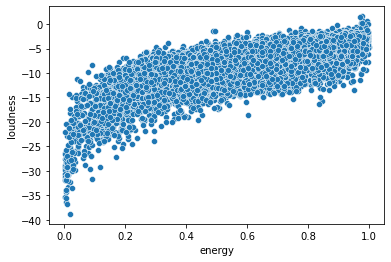

In [34]:
sns.scatterplot(x="energy", y="loudness", data=df)

We can also choose to display the distributions of each variable.

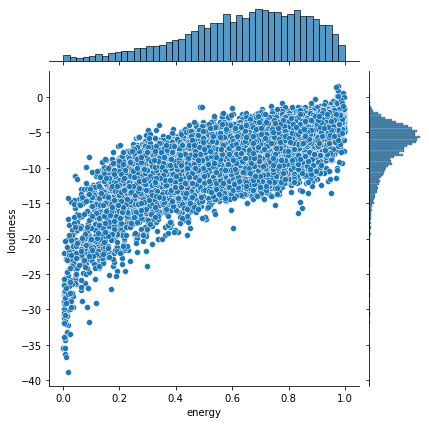

In [35]:
sns.jointplot(x="energy", y="loudness", data=df)

Since there is an apparrent linear relationship, why not fit a line as well?

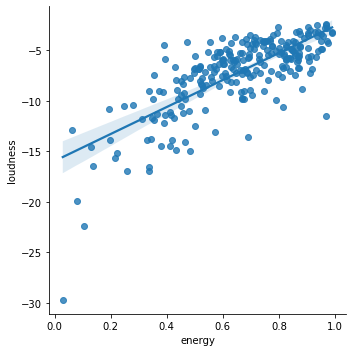

In [36]:
sns.lmplot(x="energy", y="loudness", data=df.sample(250))
# took random 250 data point only to declutter. The trend is still true.

For multiple columns to compare, pairplot is an easier way to generate multiple scatter plots.

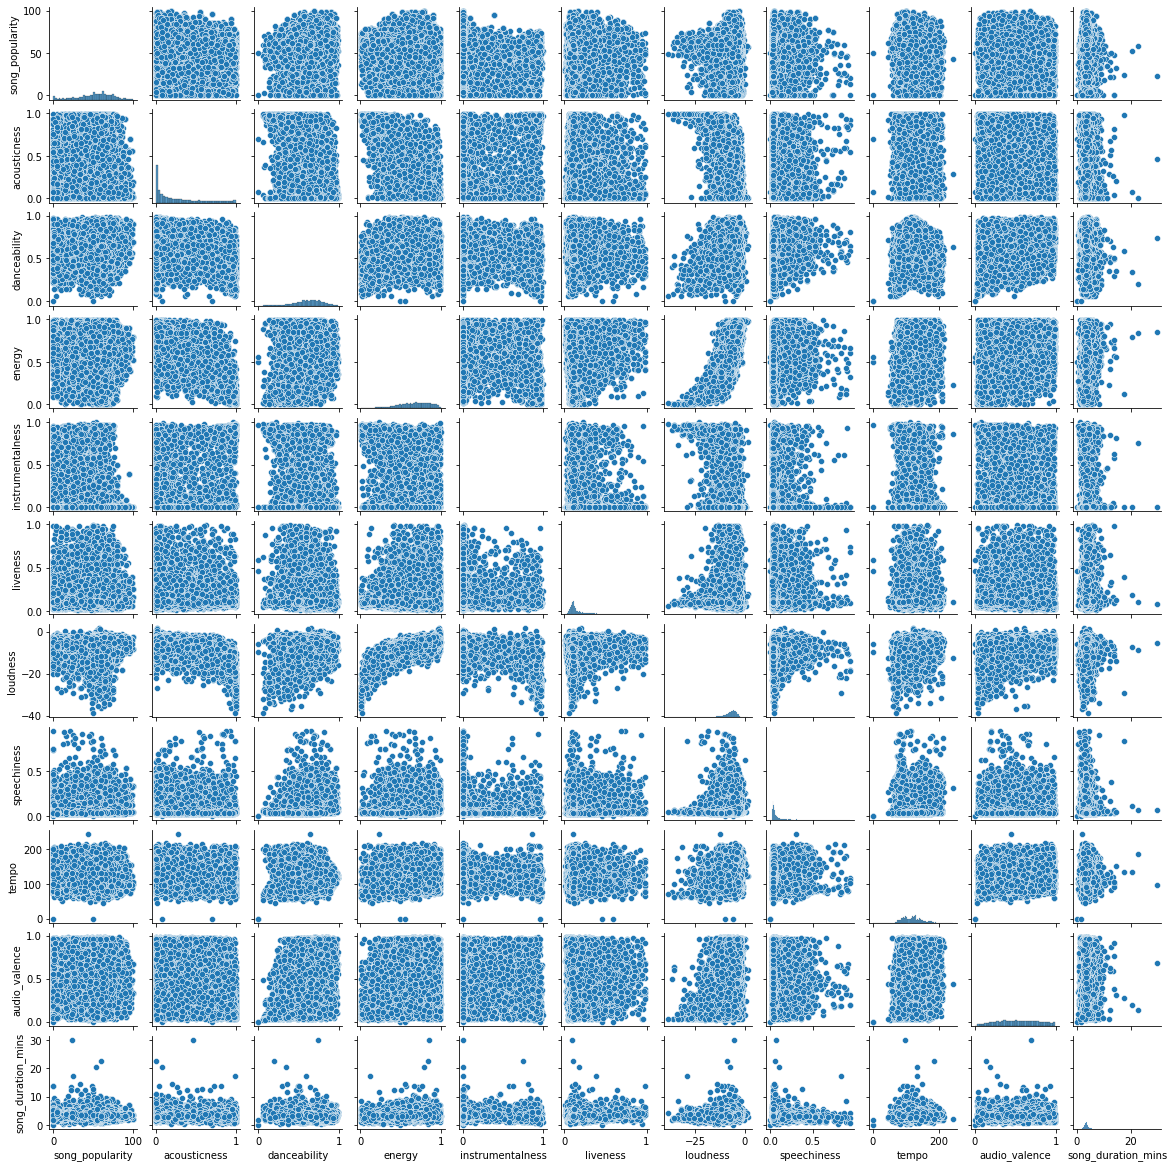

In [37]:
cols2 = np.delete(df.columns,np.where([df.columns == 'song_name',df.columns == 'outliers_3std',df.columns == 'outliers_IQR',df.columns == 'song_duration_ms'])[1])
df2 = df[cols2]

sns.pairplot(df2,height = 1.5)

In [38]:
df.columns

Index(['song_name', 'song_popularity', 'song_duration_ms', 'acousticness',
       'danceability', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature',
       'audio_valence', 'song_duration_mins', 'outliers_3std', 'outliers_IQR'],
      dtype='object')

## Box and Swarm Plots
For categorical variables, box and swarm plots can be used to observe the distribution of numerical values for each categories.

The **box plot for time_signature and danceability** tells us that those in the 4 category has higher danceability values.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

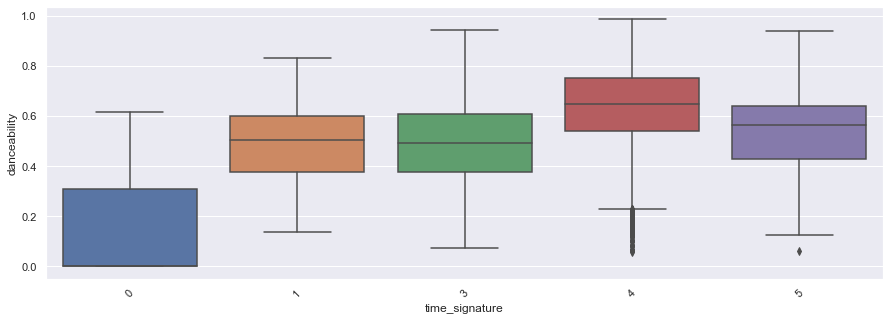

In [39]:
sns.set(rc={'figure.figsize':(15,5)})
ax=sns.boxplot(x='time_signature', y='danceability', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Swarm plot gives information about the number of observations per category.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

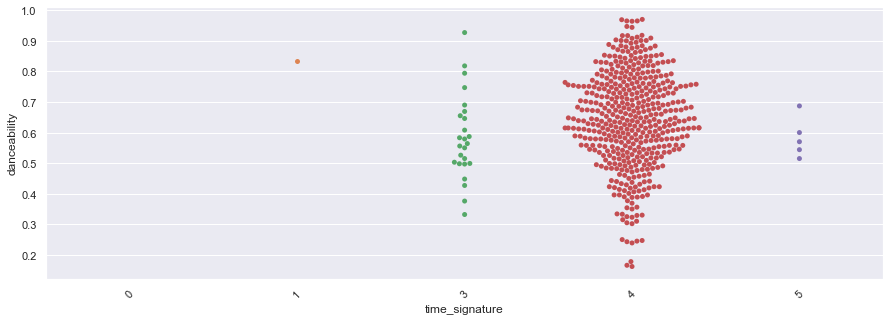

In [40]:
ax=sns.swarmplot(x='time_signature', y='danceability', data=df.sample(500))
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

# took 500 data points only to declutter

There is also countplot to just to check the count per category.

[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5')]

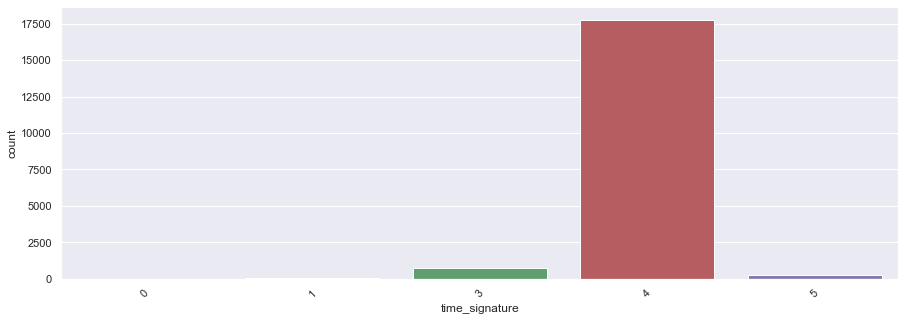

In [41]:
ax=sns.countplot(x='time_signature', data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

## Correlation Heat Map
Correlation provides information on the linear relationship of numeric variables. A positive (+) correlation results from a direct relationship, as opposed to negative (-) that results from an inverse relationship. Values closer to 0 are weaker, while those closer to 1 and -1 are stronger.

We can check for the correlation of song_popularity with other variables.

In [42]:
df.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,audio_valence,song_duration_mins,outliers_3std,outliers_IQR
song_popularity,1.000000,-0.018899,-0.065181,0.104290,0.001365,-0.130907,-0.038937,0.099442,0.021479,-0.022672,-0.052895,-0.018899,-0.089650,-0.119152
song_duration_ms,-0.018899,1.000000,-0.097882,-0.104985,0.092688,-0.015188,0.016086,0.016469,-0.083447,0.012791,-0.063421,1.000000,0.095783,0.103644
acousticness,-0.065181,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.082537,-0.557744,-0.093574,-0.136421,-0.121670,-0.097882,0.153120,0.067778
danceability,0.104290,-0.104985,-0.182500,1.000000,0.044373,-0.130483,-0.090694,0.177639,0.213728,-0.121286,0.332014,-0.104985,-0.131672,-0.053895
energy,0.001365,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.167143,0.755516,0.062053,0.162448,0.316742,0.092688,-0.159771,-0.090873
instrumentalness,-0.130907,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.032887,-0.390248,-0.081138,-0.036934,-0.178570,-0.015188,0.609273,0.440070
liveness,-0.038937,0.016086,-0.082537,-0.090694,0.167143,-0.032887,1.000000,0.102450,0.090845,0.031876,0.013789,0.016086,0.290775,0.246223
loudness,0.099442,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.102450,1.000000,0.078164,0.129938,0.199696,0.016469,-0.311798,-0.245270
speechiness,0.021479,-0.083447,-0.093574,0.213728,0.062053,-0.081138,0.090845,0.078164,1.000000,0.071685,0.011046,-0.083447,0.182765,0.352300
tempo,-0.022672,0.012791,-0.136421,-0.121286,0.162448,-0.036934,0.031876,0.129938,0.071685,1.000000,0.037667,0.012791,-0.010984,0.037250


To better process the results, we can visualize it as a heat map from which we can identify the strongest correlations.

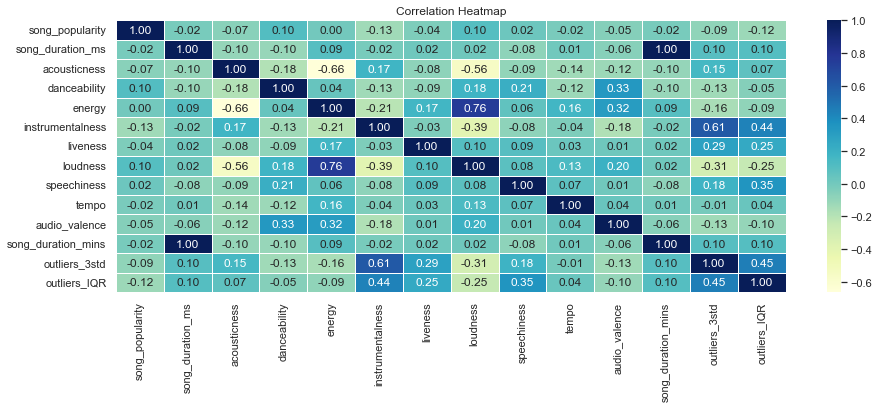

In [43]:
ax = plt.axes()
sns.heatmap(df.corr(), cmap = 'YlGnBu', annot = True, linewidth = .5, fmt = '.2f')
ax.set_title('Correlation Heatmap')
plt.show()